In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud, STOPWORDS

sns.set(style="whitegrid")


## Load Dataset

In [3]:
df = pd.read_csv("../data/jigsaw.csv")
df = df.dropna(subset=["comment_text"])  # just in case
df.head()


,id,comment_text,toxic,severe_toxic,obscene,threat,insult,identity_hate
0,0000997932d777bf,Explanation\nWhy the edits made under my usern...,0,0,0,0,0,0
1,000103f0d9cfb60f,D'aww! He matches this background colour I'm s...,0,0,0,0,0,0
2,000113f07ec002fd,"Hey man, I'm really not trying to edit war. It...",0,0,0,0,0,0
3,0001b41b1c6bb37e,"""\nMore\nI can't make any real suggestions on ...",0,0,0,0,0,0
4,0001d958c54c6e35,"You, sir, are my hero. Any chance you remember...",0,0,0,0,0,0


## Label Distribution

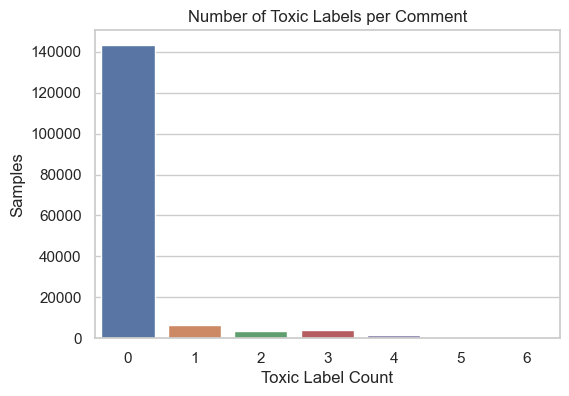

In [4]:
label_cols = ["toxic", "severe_toxic", "obscene", "threat", "insult", "identity_hate"]

df["num_labels"] = df[label_cols].sum(axis=1)

plt.figure(figsize=(6, 4))
sns.countplot(x="num_labels", data=df)
plt.title("Number of Toxic Labels per Comment")
plt.xlabel("Toxic Label Count")
plt.ylabel("Samples")
plt.show()


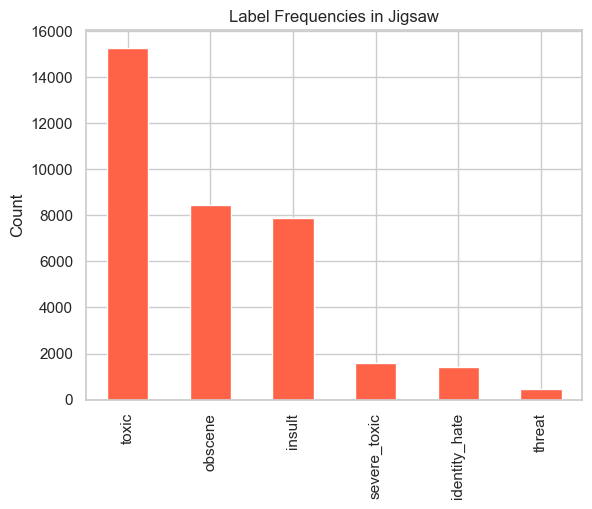

In [5]:
df[label_cols].sum().sort_values(ascending=False).plot(kind='bar', color='tomato')
plt.title("Label Frequencies in Jigsaw")
plt.ylabel("Count")
plt.show()


## Text Length Analysis

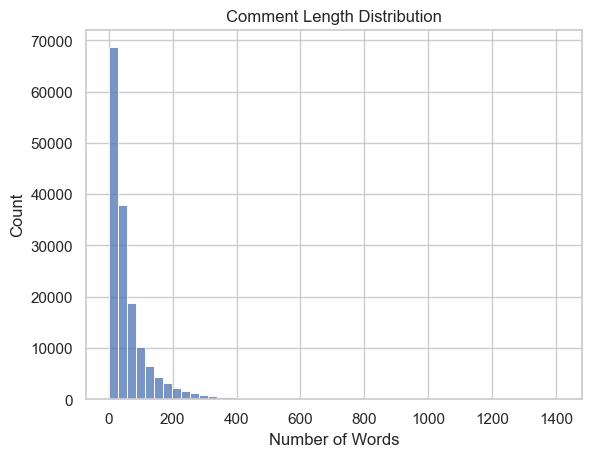

In [6]:
df["text_length"] = df["comment_text"].apply(lambda x: len(str(x).split()))

sns.histplot(df["text_length"], bins=50)
plt.title("Comment Length Distribution")
plt.xlabel("Number of Words")
plt.show()


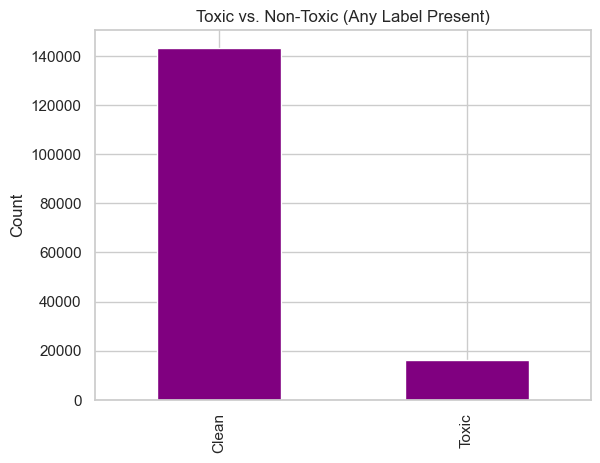

In [9]:
df["is_toxic"] = (df[label_cols].sum(axis=1) > 0).astype(int)
df["is_toxic"].value_counts().plot(kind='bar', color='purple')
plt.title("Toxic vs. Non-Toxic (Any Label Present)")
plt.xticks([0, 1], ["Clean", "Toxic"])
plt.ylabel("Count")
plt.show()


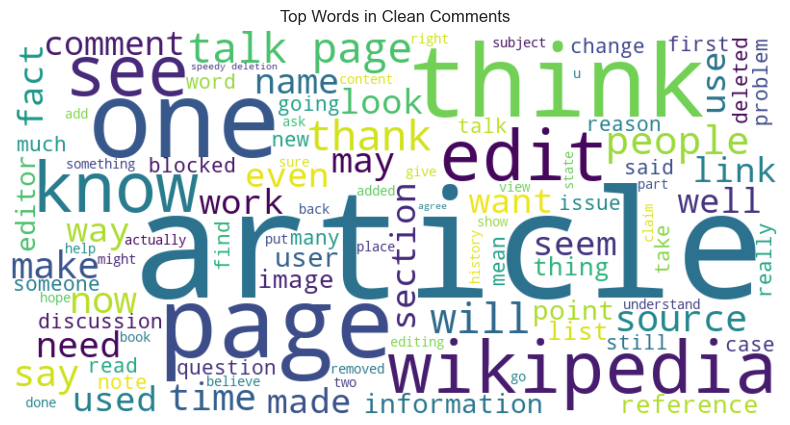

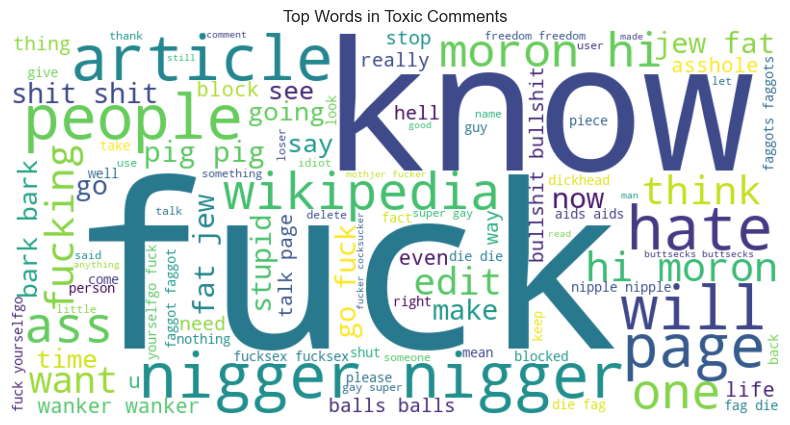

In [10]:
stopwords = set(STOPWORDS)

for label_val, label_name in {0: "Clean", 1: "Toxic"}.items():
    subset = df[df["is_toxic"] == label_val]
    text_blob = " ".join(subset["comment_text"].astype(str)).lower()

    wordcloud = WordCloud(width=800, height=400, background_color='white',
                          stopwords=stopwords, max_words=100).generate(text_blob)

    plt.figure(figsize=(10, 5))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis("off")
    plt.title(f"Top Words in {label_name} Comments")
    plt.show()
